##### Project: Mall Customer Segmentation Data
Link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

**Content**

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

## 1. Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import itertools
from scipy.stats import chi2_contingency
from itertools import product
import scipy.stats as ss

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from fast_ml.feature_selection import get_duplicate_features

import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns', None)
import os
import pathlib
import pickle
import sys 


## 2. Functions

In [11]:
# Call functions
sys.path.insert(1, '/Users/macbookpro/Desktop/PYTHON/1. PROJECTS/Help_files/')

from Functions import compute_vif, calc_outliers_df, calc_outliers_var, distribution, corr_cat, box_plot, distplot, histplot

## 3. Import Data

In [5]:
# Import training dataset
df = pd.read_csv(r'/Users/macbookpro/Desktop/PYTHON/1. PROJECTS/4. Mall_Customer_Segmentation/2. Data/Mall_Customers.csv')
print('Shape of the dataset: ', df.shape)

Shape of the dataset:  (200, 5)


## 4. Exploratory Data Analysis

In [7]:
# Inspect the dataset
print('The shape of the dataset: ', df.shape)
df.head()

The shape of the dataset:  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 4.1 Univariate Analysis
1. Dataset has only unique customers. Number of unique customers is 200.
2. Number of women is 12pp higher than number of men.
3. Age 
    * Is not ditributed normally. 
    * The mean is greater than media, so we have a positive skewness. 
    * Finally, participants with higher density is in the range between 32 to 37.
    * The std of 13.9, indicates that we have a moderate spread out of ages from the mean of 38.9. It also, indicates the diversity of customers in different age groups. 
4. Annual income
    * The is a high range of values from 15k to 135k. 
        * I suppose that customers with lower annual income are younger in age. On the other hand customers with high income are older.
        * I also suppose that customers with higher income have higher ranking score.
    * The median and mean are almost equal, it indicates that we have a normally distributed variable. The distribution of annual income is roughly symmetrical and the 50% of income is around mean value (61k)
    * Std indicates a moderate
    *The mean annual income (61k) is relatively high

In [9]:
# 1. Check the number of customers
print('NUmber of unique customers is: ', df['CustomerID'].nunique())

NUmber of unique customers is:  200


In [36]:
# 2. Check the distribution of genders
gender_abs = df['Gender'].value_counts().to_frame(name='Gender (abs)')
gender_prc = df['Gender'].value_counts(normalize=True).mul(100).to_frame(name='Gender (prc)')
gender = pd.concat([gender_abs, gender_prc], axis=1)
gender

,Gender (abs),Gender (prc)
Female,112,56.0
Male,88,44.0


,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


Skewness of the Age is : 0.48556885096681657


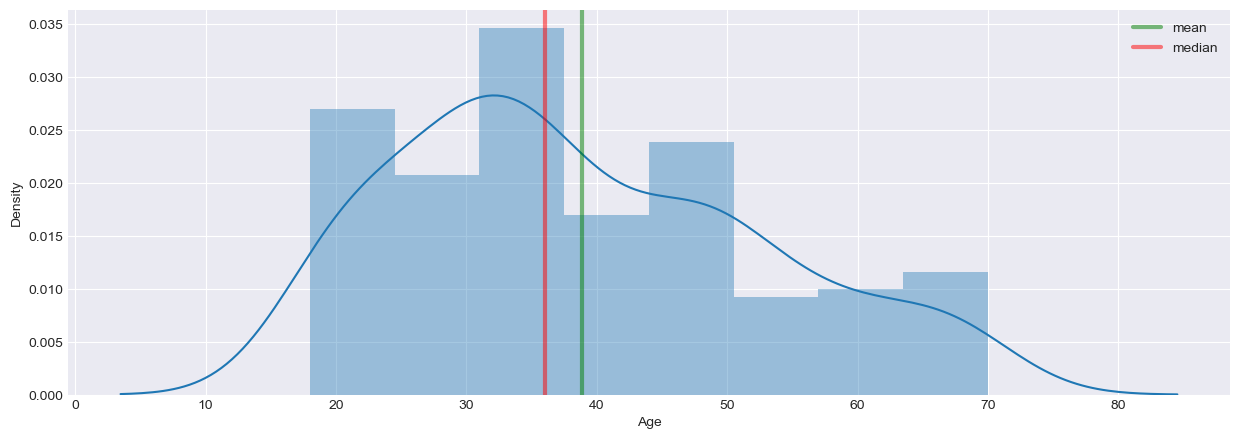

In [40]:
# 3. What is the distribution of ages
display(df['Age'].describe().to_frame())

distplot(df, 'Age')

,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


Skewness of the Annual Income (k$) is : 0.3218425498619055


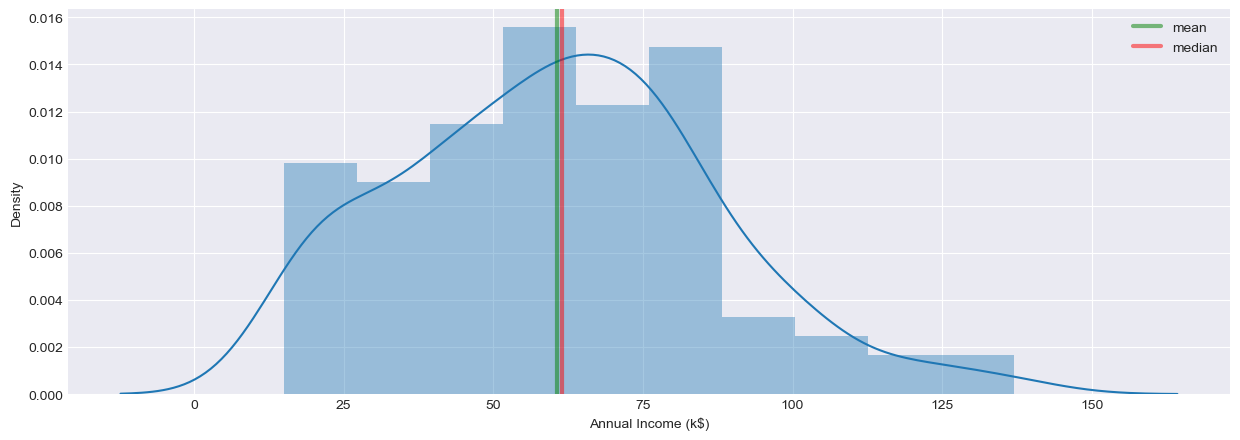

In [42]:
# 4. What is the distribution of Annual income
display(df['Annual Income (k$)'].describe().to_frame())
distplot(df, 'Annual Income (k$)')